## Задача* + домашняя работа

Поработаем с датасетом о [пользователях кредитных карт](https://www.kaggle.com/arjunbhasin2013/ccdata). 

Данные лежат в `data/credit_card.csv`. 

### Easy

Нужно посмотреть, по каким переменным имеет смысл объединять пользователей в группы (например, используя `sns.pairplot`). Можно взять все признаки. Провести кластеризацию, подобрав количество кластеров "на глаз".

### Normal

Определить количество кластеров при помощи метода Elbow.

Вывести график с разделением на группы в координатах `BALANCE`-`PURCHASES` и `BALANCE`-`PURCHASER_INSTALLMENTS_FREQUENCY`. Видны ли какие-то закономерности?

### Hard

Посмотреть зависимости между другими признаками и попробовать проинтерпретировать какие-то кластеры.

**Решение Easy и Normal**

Загрузим таблицу данных по картам

In [1]:
# Ваш код здесь
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import seaborn as sns

In [2]:
df = pd.read_csv('../data/credit_card.csv')
df = df.dropna()
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12

Построим матрицу зависимостей для обнаружения зависимостей параметров вручную

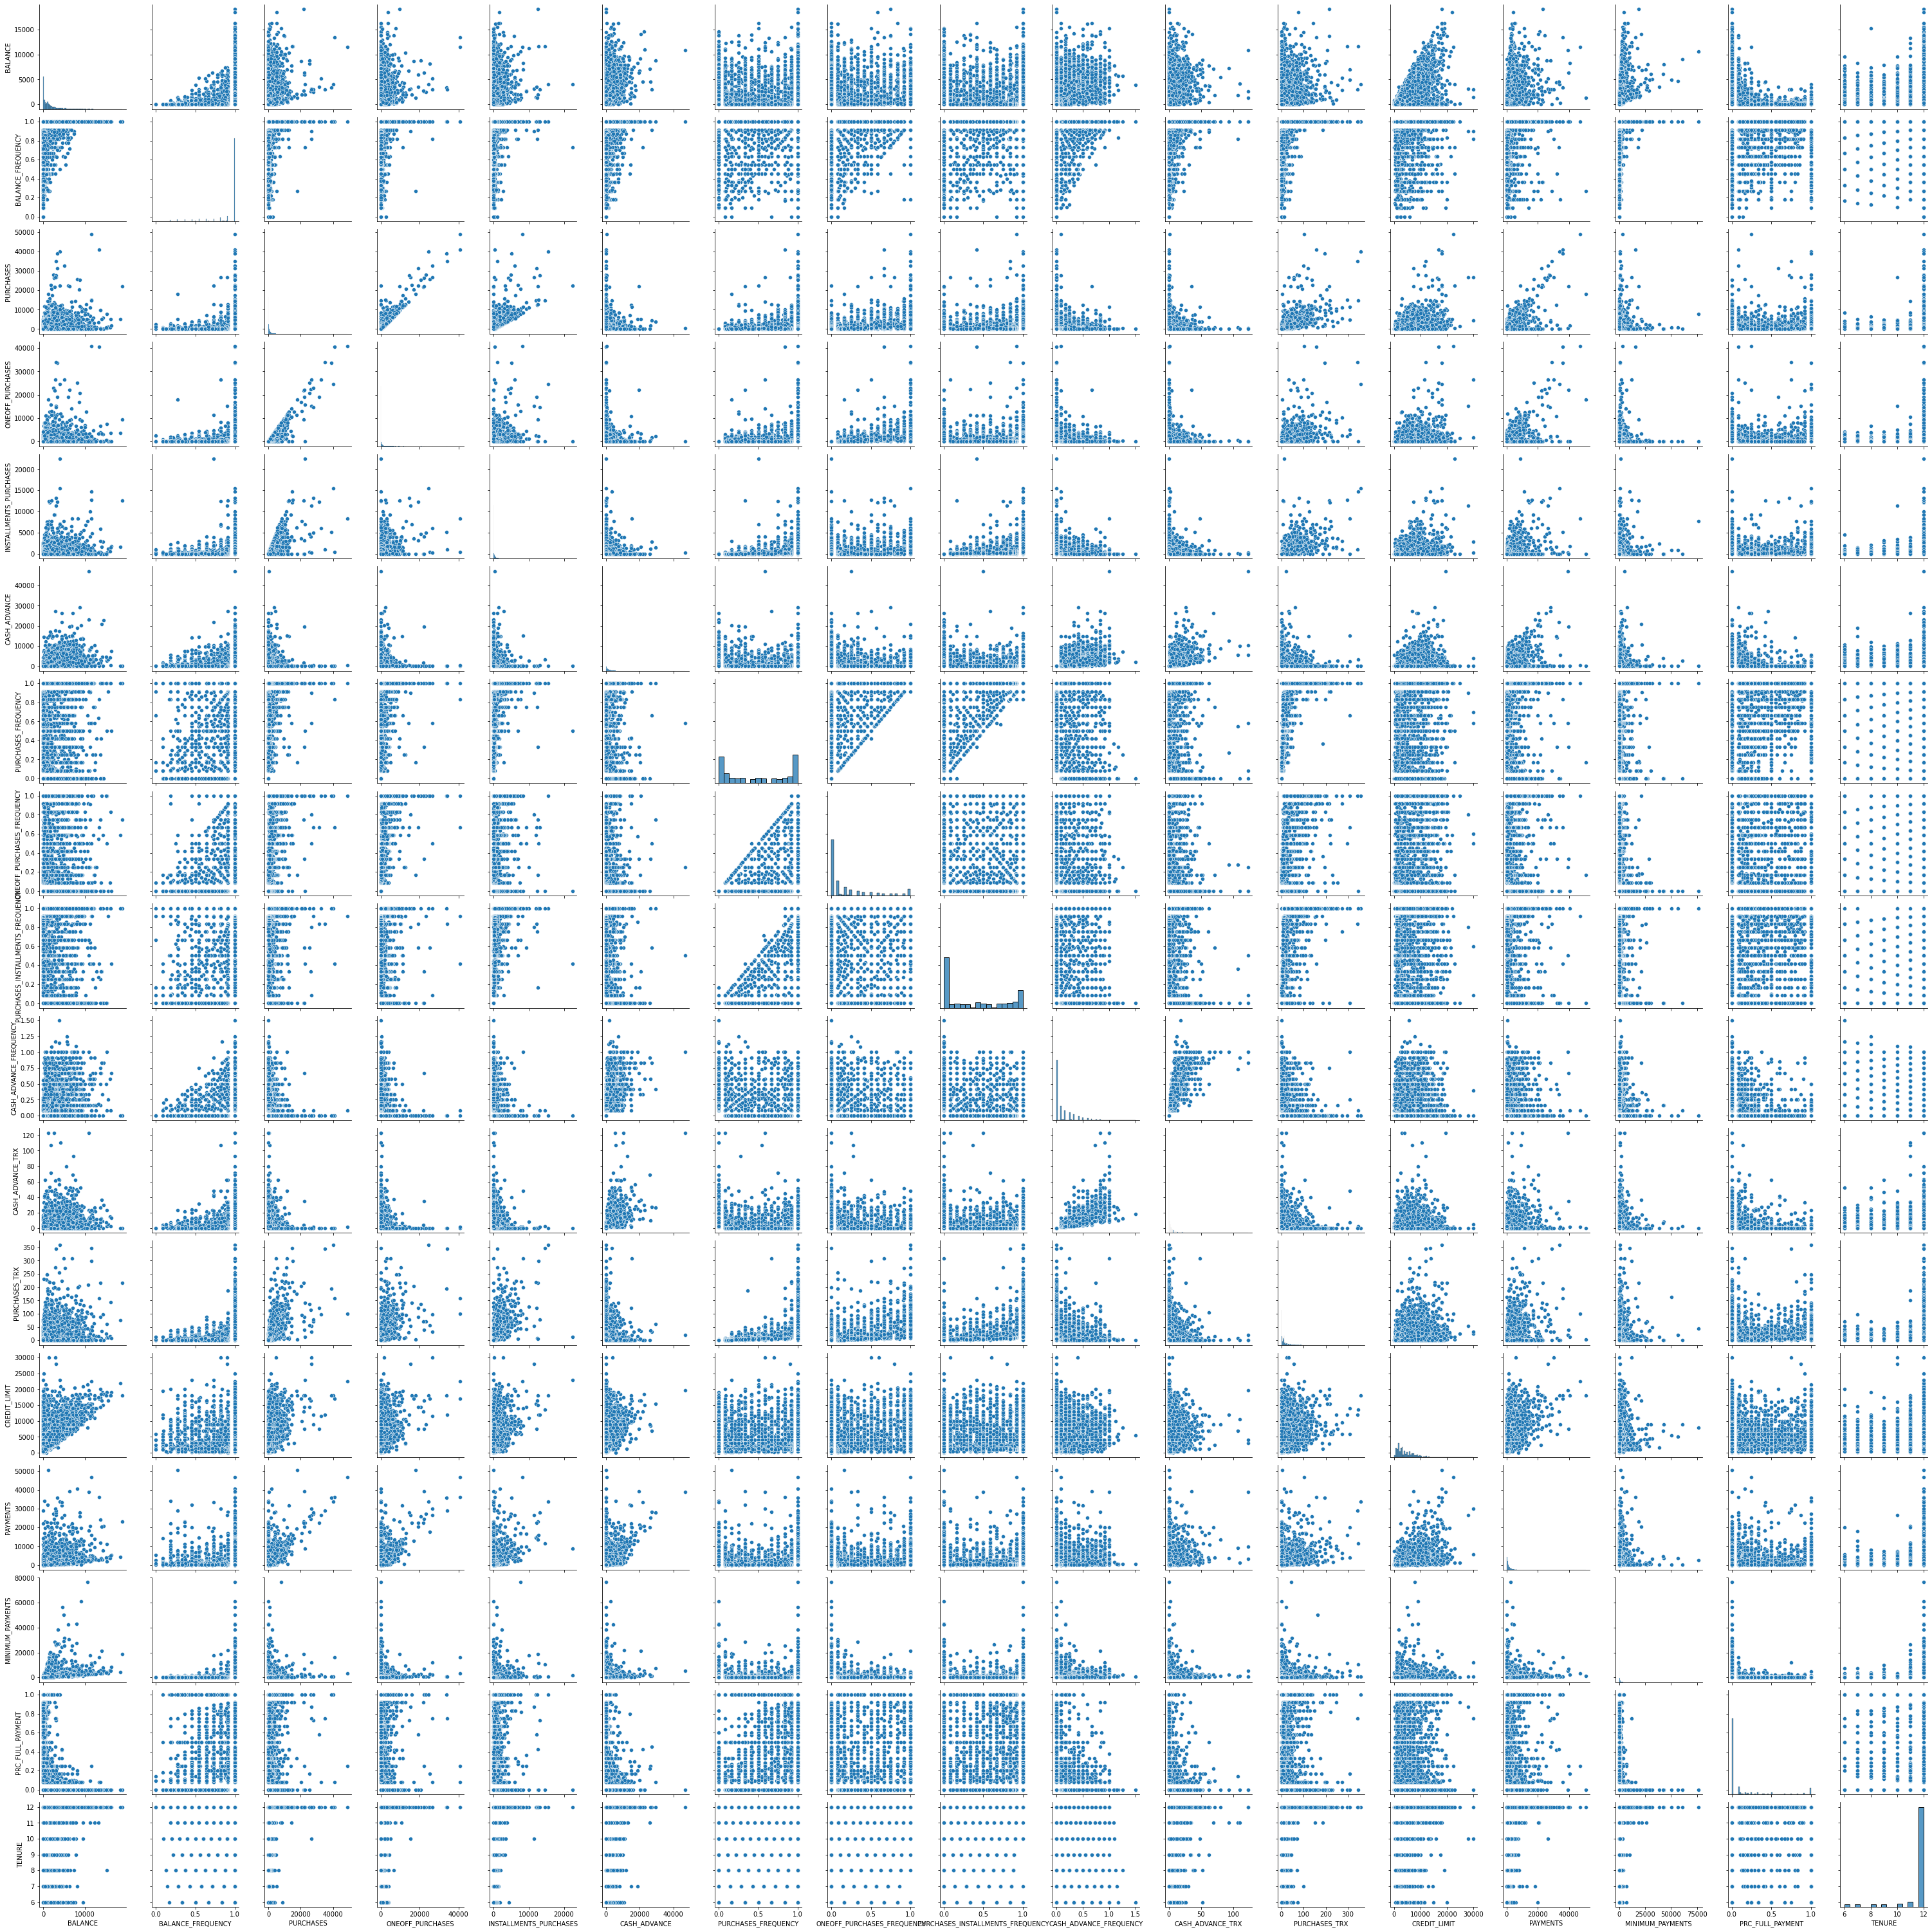

In [5]:
sns.pairplot(df)

Попробуем на глаз выставить количество групп. Для этого воспользуемся KMeans и укажем количество групп 5 как оптимальное.

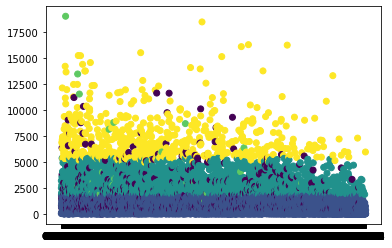

In [6]:
model = KMeans(5)
df_best = df[['BALANCE', 'PURCHASES']]
labels = model.fit_predict(df_best)
plt.scatter(df.values[:, 0], df.values[:, 1], c=labels)

**Normal.**

Применим Elbow method (метод согнутой руки), для нахождения оптимального количество кластеров.

In [ ]:
def distance_by_n(x, n):
    model = KMeans(n_clusters=n)
    model.fit(x)
    return model.inertia_

Text(0.5, 1.0, 'Elbow method')

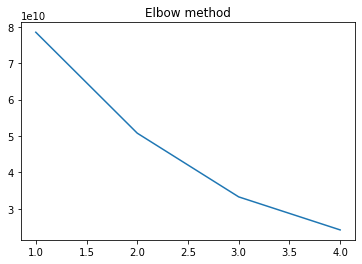

In [ ]:
distances = [distance_by_n(df.values, n) for n in range(1, 5)]
plt.plot(range(1, 5), distances)
plt.title('Elbow method')

График не содержит резкого изгиба. Оптимальное количество групп от двух до трех. Т.е. изначальное предоположение о пяти группах избыточно

Выведим график с разделением на группы в координатах `BALANCE`-`PURCHASES` и `BALANCE`-`PURCHASER_INSTALLMENTS_FREQUENCY`. Попробуем выделить закономерности.

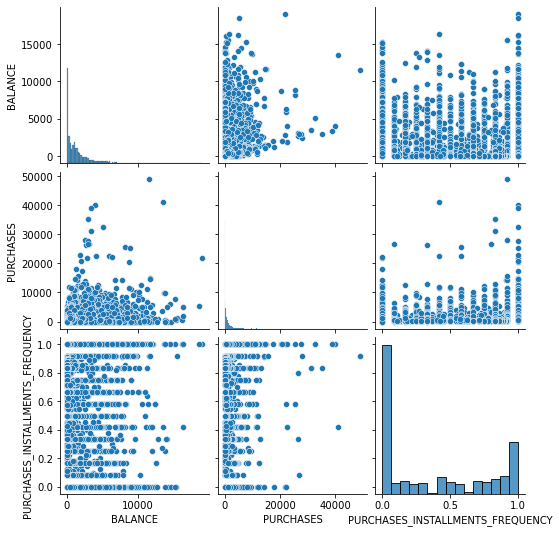

In [ ]:
sns.pairplot(df[['BALANCE', 'PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY']])

**Hard**

Посмотреть зависимости между другими признаками и попробовать проинтерпретировать какие-то кластеры.

Попробуем снизить размерность данных до 2 и отобразим кластеризацию на получившемся двухмерном пространстве. Это даст возможность взглянуть на данные в целом.

Text(0.5, 1.0, 'PCA')

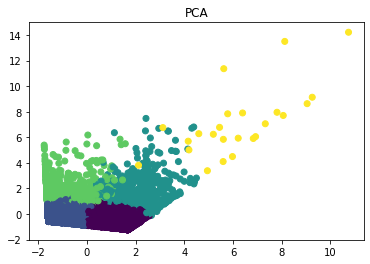

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca_result = pca.fit_transform(df.values)
model_labels = model.fit_predict(df.values)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=model_labels)
plt.title('PCA')

Компановка групп в PCA выполнена иначе. К сожалению в этой компановке не видно других взаимосвязей.

Выполним обратное преобразование. Восстановим размерность из сжатого пространства

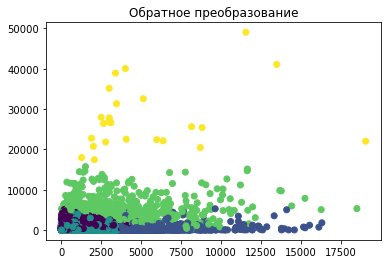

In [ ]:
inverse = pca.inverse_transform(pca_result)
plt.figure()
plt.title('Обратное преобразование')
model_labels = model.fit_predict(df.values)
plt.scatter(inverse[:, 0], inverse[:, 1], c=model_labels)

Построим дендограмму


In [8]:
#from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram , linkage

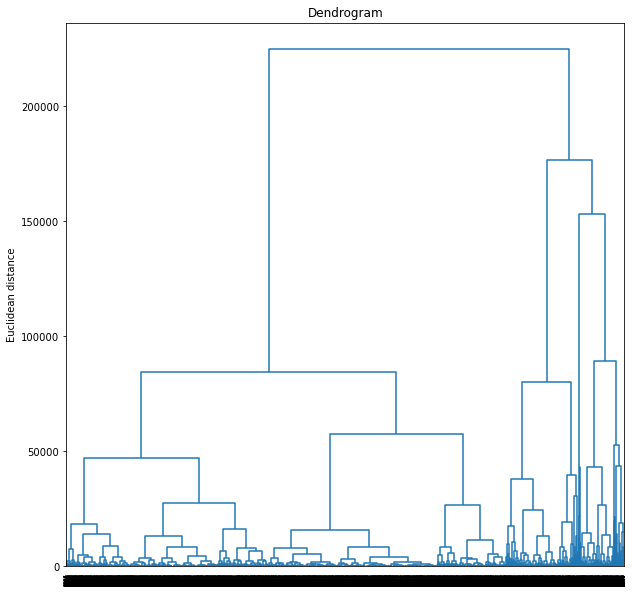

In [ ]:
Z = linkage(df.values, method = 'ward')
#plotting dendrogram
plt.figure(figsize =(10, 10))
dendro = dendrogram(Z, color_threshold = 100)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

Попробуем поискать кластеры в автоматическом режиме с помощью алгоритма DBSCAN.

In [ ]:
from sklearn.cluster import DBSCAN
from collections import Counter

In [ ]:
df_std = (df - df.mean()) / df.std()
df_std = df_std.fillna(0.0)
model = DBSCAN()
labels = model.fit_predict(df_std)
#df['cluster'] = labels
len(Counter(labels).keys())
#df_best = df_std[['BALANCE', 'PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'PURCHASES_FREQUENCY', 'cluster']]

C:\Users\Bazil\AppData\Local\Temp/ipykernel_73276/1633865772.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_std = (df - df.mean()) / df.std()


51

Найденных групп слишком много: 51. Попробуем загрубить алгоритм поиска. Воспользуемся методом согнутой руки для поиска оптимального количества групп dbscan

In [ ]:
def distance_by_n_dbscan(x, n):
    model = DBSCAN(min_samples=n)
    model.fit(x)
    model.labels_
    return len(Counter(model.labels_).keys())

Text(0.5, 1.0, 'Elbow method for DBSCAN')

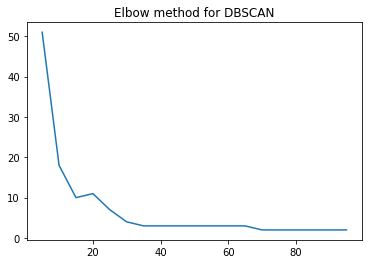

In [ ]:
distances = [distance_by_n_dbscan(df_std.values, n) for n in range(5, 100, 5)]
plt.plot(range(5, 100, 5), distances)
plt.title('Elbow method for DBSCAN')
#labels = DBSCAN(min_samples=50).fit_predict(df_std)
#df['cluster'] = labels
#len(Counter(labels).keys())

Оптимальное количество n_samples для dbsan находится между 30 и 40. Возьмем n_samples = 35 и построим на количество кластеров при этом параметре

In [ ]:
model = DBSCAN(min_samples=35)
labels = model.fit_predict(df_std)
df['cluster'] = labels
s = set(labels)
s

{-1, 0, 1}

При n_samples = 35, DBSCAN  нашел три группы для класстеризации. Это более оптимальная группировка. Попробуем Построить двухмерные графики зависимостей и найти взаимосвязи между категориями

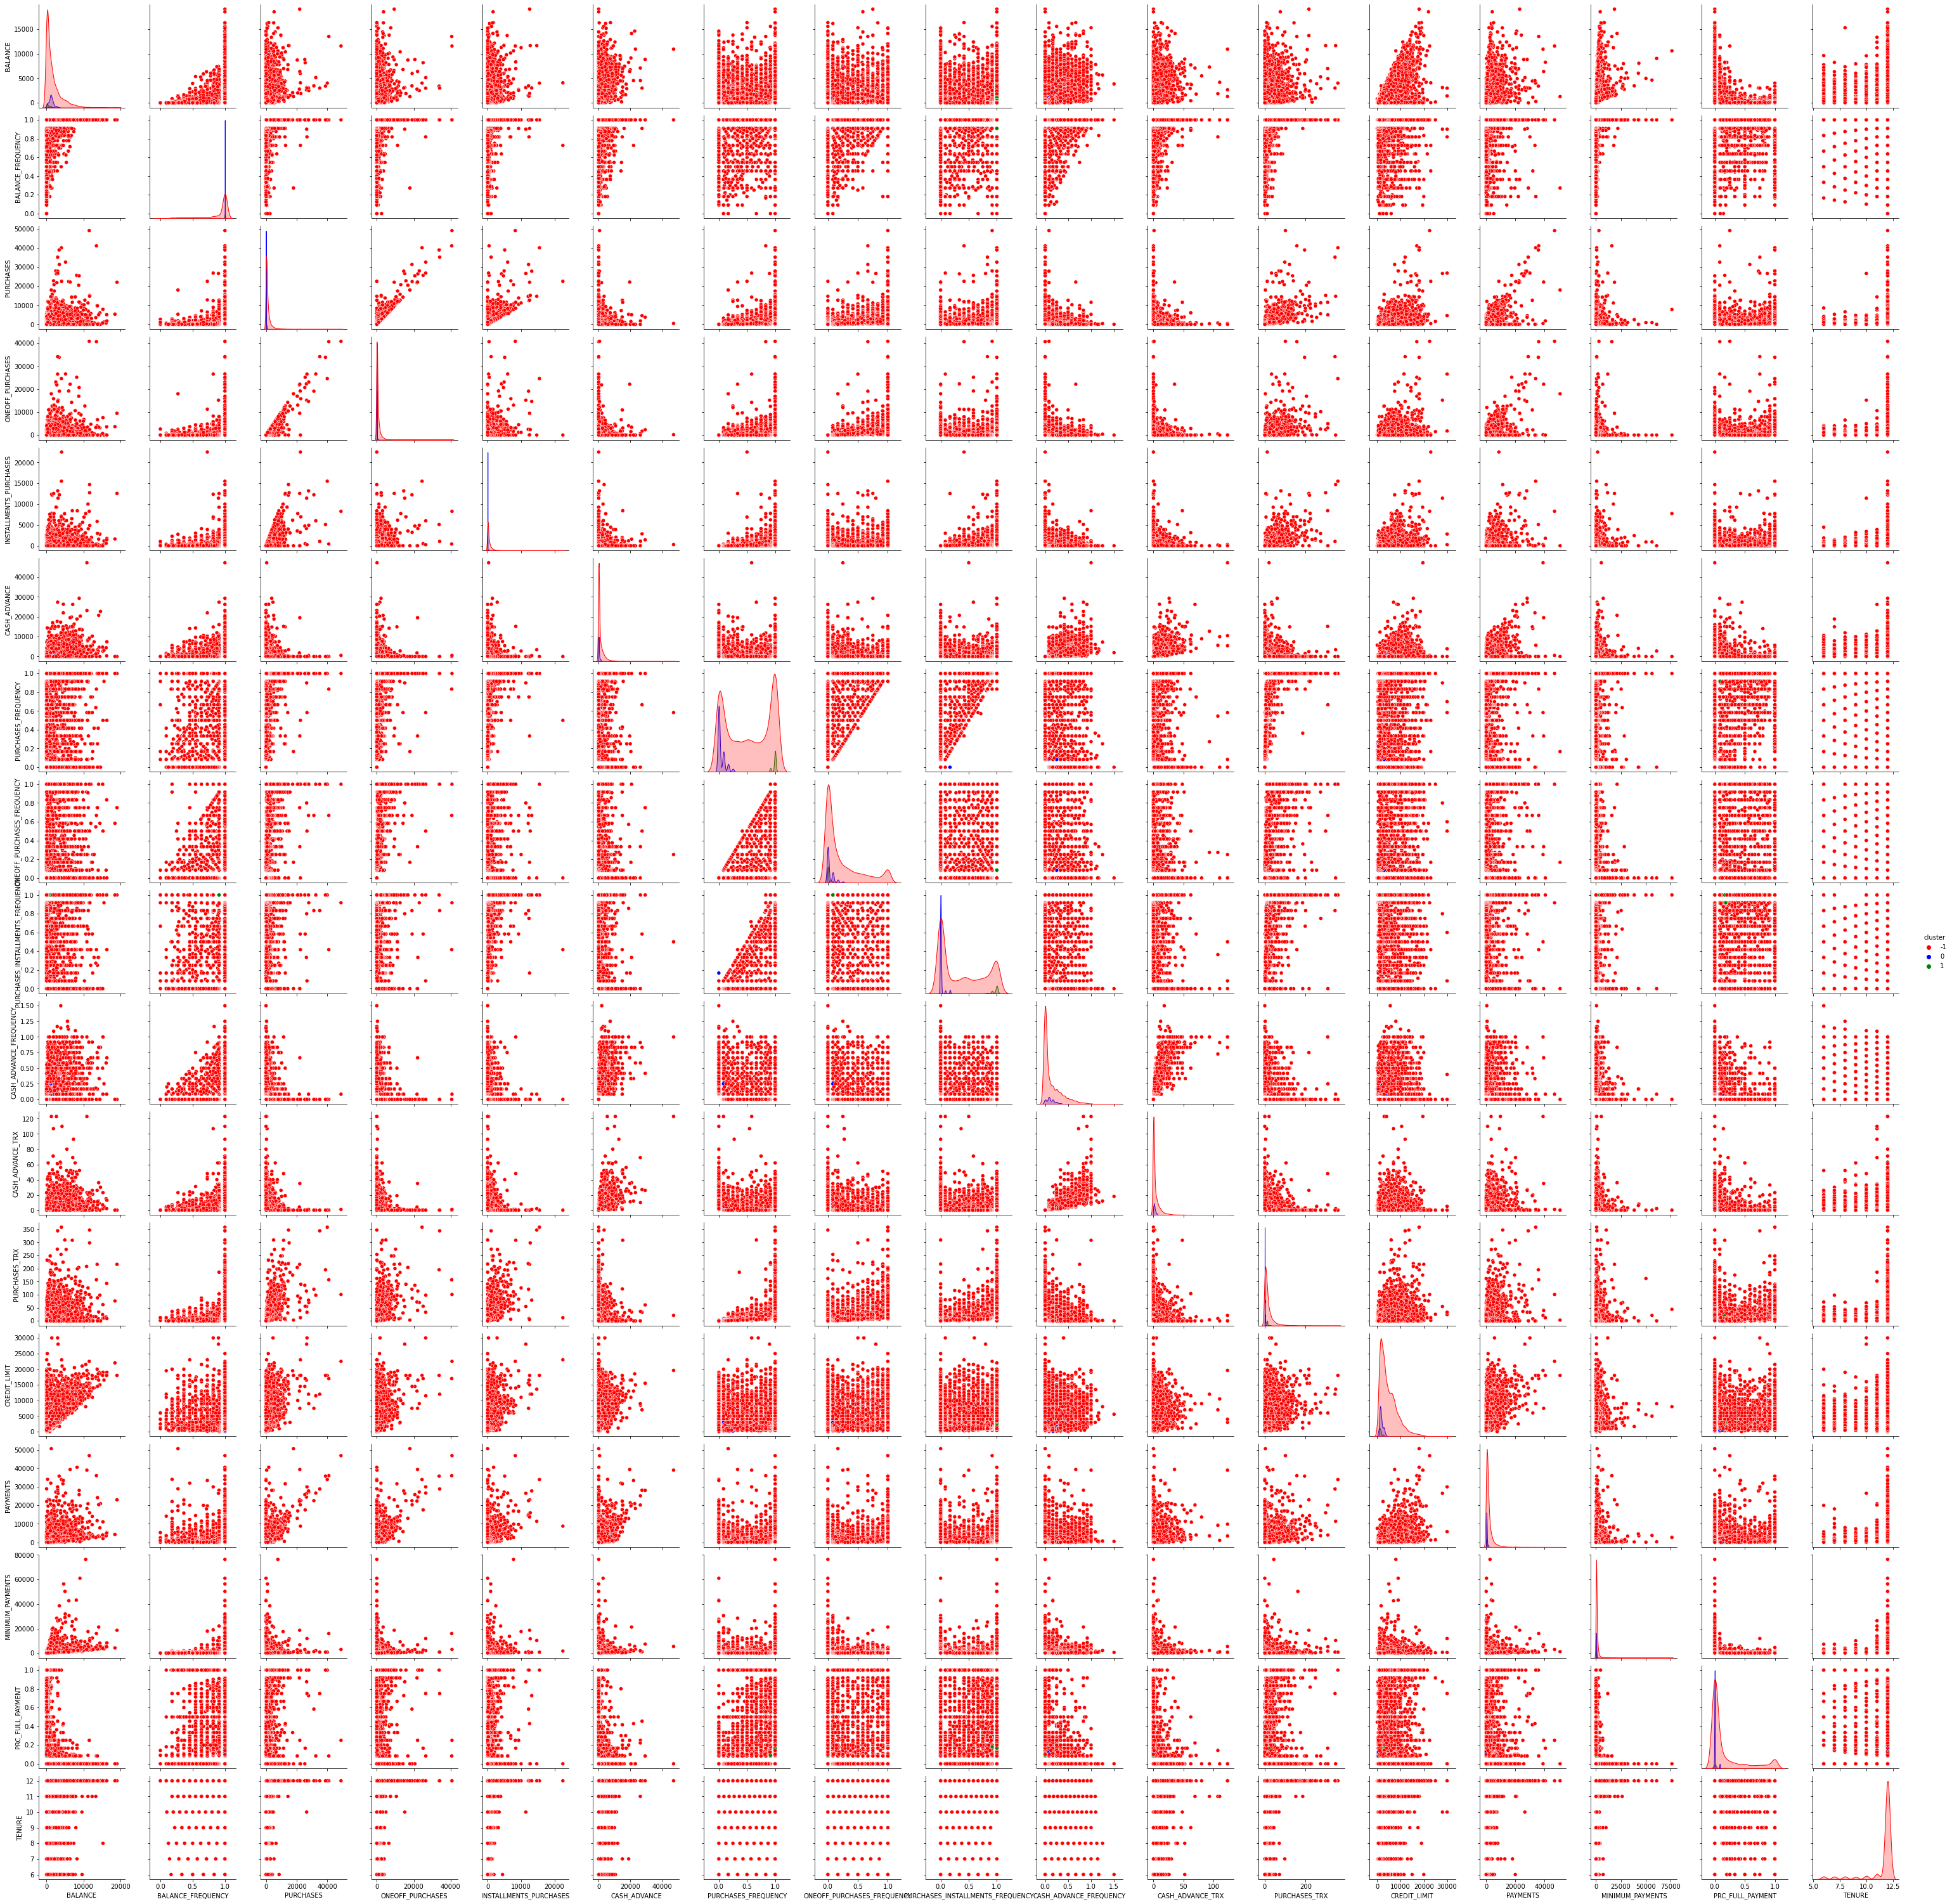

In [ ]:
sns.pairplot(df, hue = 'cluster', palette = {-1 : "red", 0 : "blue", 1 : "green"})

Алгоритм DBSCAN определил три основных класстера в данных. Однако 99% большинство пользователей входят в первый кластер. Попробуем снизить размерность и запусть dbscan вновь

In [ ]:
df_best = df[['BALANCE', 'PURCHASES', 'PURCHASES_FREQUENCY']]
df_std_best = (df_best - df_best.mean()) / df_best.std()
df_std_best = df_std_best.fillna(0.0)
model = DBSCAN(leaf_size = 10)
labels = model.fit_predict(df_best)
df_best['cluster'] = labels

C:\Users\Bazil\AppData\Local\Temp/ipykernel_73276/2024827477.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best['cluster'] = labels


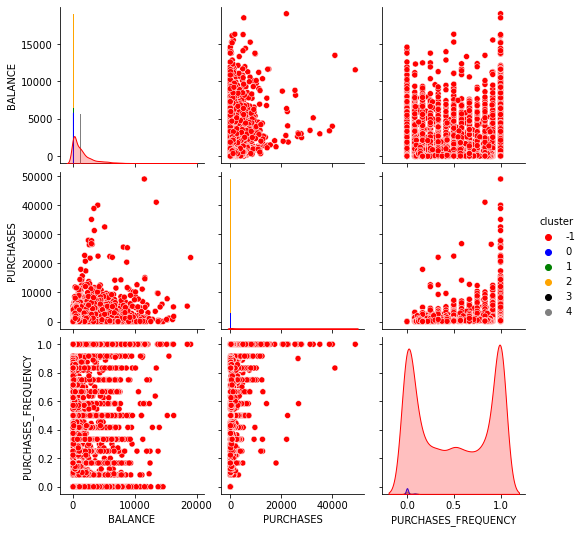

In [ ]:
sns.pairplot(df_best, hue = 'cluster', palette = {-1 : "red", 0 : "blue", 1 : "green", 2 : "orange", 3 : "black", 4 : "gray"})

Снижение групп размерностей не приводит к нужному эффекту. DBSCAN отказывается кластеризовывать группы, не видя в них значимых отличий (кластеров).

Попробуем применить другой алгоритм кластеризации. Например агломеративную кластеризацию c 4 группами по-умолчанию. Она работает быстро.

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [21]:
model_sp = AgglomerativeClustering(n_clusters=4)
labels = model_sp.fit_predict(df_best)
df_best['cluster_sp'] = labels

C:\Users\Bazil\AppData\Local\Temp/ipykernel_57924/3909818210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best['cluster_sp'] = labels


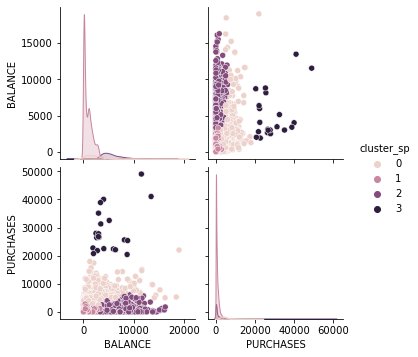

In [22]:
sns.pairplot(df_best, hue = 'cluster_sp')

Алгомеративная кластеризация выглядит интересней. Ее рзабивка на 4 группы лучше согласуется с гипотезой о том, что в данных присутствуют четыре группы держателей карт: 
- Большие балансы, мало совершают покупок - капиталисты (пираты) (группа 2).
- Маленькие балансы, мало совершают покупок - экономные пользователи (группа 1).
- Невысокие балансы, но много совершают покупок - мечтатели (группа 3)
- Все остальные. Совершают умеренное количество покупок, имея высокий разброс балансов (группа 0)

Эта кластеризация согласуется с ислледованием по [этой ссылке](https://www.kaggle.com/halflingwizard/interpret-k-means-clusters-on-credit-card-dataset). 

### Выводы
Алгоритмы кластеризации различны, и работаеют по-разному на разных типах данных. Нет плохих и хороших алгоритмов кластеризации. Есть подходящие. Универсальные алгоритмы кластеризации существуют, но их работу все равно нужно проверять. Возможно существует более подходящий алгоритм кластеризации для определенной задачи, который может решить задачу лучше, чем универсальный алгоритм.